In [1]:
import pandas as pd
import os
import datetime

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

%matplotlib inline

In [2]:
data_folder = os.path.join(os.path.expanduser('~'), 
                           'Documents', 'Projects', 'WeatherWind', 'data')

In [3]:
# https://www.nordpoolgroup.com/historical-market-data/
data_file = 'wind-power-dk_2018_hourly.xls'
df = pd.read_html(os.path.join(data_folder, data_file))[0]
df.head()

Wind power DK in MWh                        
  Data was last updated 01-01-2019                        
                Unnamed: 0_level_2    Hours     DK1    DK2
0                       01-01-2018  00 - 01  1729.0  649.0
1                       01-01-2018  01 - 02  1763.0  613.0
2                       01-01-2018  02 - 03  1508.0  663.0
3                       01-01-2018  03 - 04  1514.0  723.0
4                       01-01-2018  04 - 05  1523.0  713.0

In [4]:
df.columns

MultiIndex(levels=[['Wind power DK in MWh'], ['Data was last updated 01-01-2019'], ['DK1', 'DK2', 'Hours', 'Unnamed: 0_level_2']],
           codes=[[0, 0, 0, 0], [0, 0, 0, 0], [3, 2, 0, 1]])

In [5]:
data_df = df['Wind power DK in MWh']['Data was last updated 01-01-2019'].copy()

In [6]:
data_df = data_df.rename(columns={'Unnamed: 0_level_2': 'Date'})

In [7]:
data_df['start_hour'] = data_df['Hours'].apply(lambda x: x.split('-')[0].split('\xa0')[0])

In [9]:
def date_string_to_datetime(date_string, hours):
    date_split = [int(x) for x in date_string.split('-')]
    datetime_obj = datetime.datetime(date_split[2], date_split[1], date_split[0], hours)
    return datetime_obj

#data_df['date_time'] = data_df.apply(lambda x: date_string_to_datetime(x['Date'], 
#int(x['start_hour'])), axis=1)    

In [10]:
data_df['date_time'] = data_df['Date'] + ' ' + data_df['start_hour']
data_df['date_time'] = pd.to_datetime(data_df['date_time'])
data_df = data_df.sort_values('date_time')

In [11]:
data_df.head()

,Date,Hours,DK1,DK2,start_hour,date_time
0,01-01-2018,00 - 01,1729.0,649.0,00,2018-01-01 00:00:00
1,01-01-2018,01 - 02,1763.0,613.0,01,2018-01-01 01:00:00
2,01-01-2018,02 - 03,1508.0,663.0,02,2018-01-01 02:00:00
3,01-01-2018,03 - 04,1514.0,723.0,03,2018-01-01 03:00:00
4,01-01-2018,04 - 05,1523.0,713.0,04,2018-01-01 04:00:00


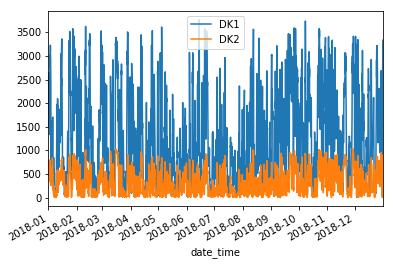

In [12]:
data_df.plot('date_time', ['DK1', 'DK2'])

In [13]:
trace = go.Scatter(x=data_df['date_time'],
                    y=data_df['DK1'], mode='lines+markers')
data = [trace]

In [14]:
iplot(data, filename="mytemp")